# gdp per capita and hk total generated per day

Model Summary:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.821e+04   1030.912     17.660      0.000     1.6e+04    2.04e+04
HK GDP per capita    -0.0062      0.003     -1.883      0.076      -0.013       0.001

R-squared: 0.1645


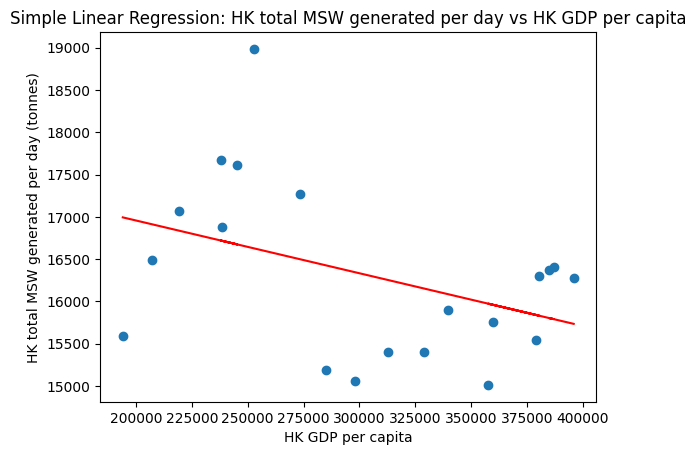

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK total MSW generated per day vs HK GDP per capita

# Prepare data
# Make sure the relevant columns are numeric
df["HK GDP per capita"] = pd.to_numeric(df["HK GDP per capita"], errors="coerce")
df["HK total MSW generated (tonnes)"] = pd.to_numeric(
    df["HK total MSW generated (tonnes)"], errors="coerce"
)

# Add number of days in each year (leap years: 2004, 2008, 2012, 2016, 2020, 2024)
leap_years = [2004, 2008, 2012, 2016, 2020, 2024]
df["Year"] = df["Year"].astype("Int64")
df["days_in_year"] = df["Year"].apply(
    lambda y: 366 if (pd.notna(y) and int(y) in leap_years) else 365
)

# Compute HK total MSW generated per day (tonnes/day)
df["HK MSW generated per day (tonnes)"] = (
    df["HK total MSW generated (tonnes)"] / df["days_in_year"]
)

# Keep only rows where both variables are available
mask = df["HK GDP per capita"].notna() & df["HK MSW generated per day (tonnes)"].notna()
X_gdppc = df.loc[mask, ["HK GDP per capita"]]
y_msw_per_day = df.loc[mask, "HK MSW generated per day (tonnes)"]

# Fit model using sklearn for predictions
lin_reg_gdppc = LinearRegression()
lin_reg_gdppc.fit(X_gdppc, y_msw_per_day)

# Fit model using statsmodels for statistical tests
X_gdppc_sm = sm.add_constant(X_gdppc)  # Add constant term for intercept
model_gdppc = sm.OLS(y_msw_per_day, X_gdppc_sm)
results_gdppc = model_gdppc.fit()

# Predictions for plotting
y_pred_msw_per_day = lin_reg_gdppc.predict(X_gdppc)

print("Model Summary:")
print(results_gdppc.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gdppc.rsquared:.4f}")

# Plot
plt.scatter(X_gdppc, y_msw_per_day)
plt.plot(X_gdppc, y_pred_msw_per_day, color='red')
plt.xlabel('HK GDP per capita')
plt.ylabel('HK total MSW generated per day (tonnes)')
plt.title('Simple Linear Regression: HK total MSW generated per day vs HK GDP per capita')
plt.show()


**GDP per capita coefficient ($\hat \beta_1$) ≈ -0.0064 (p = 0.068 > 0.05)**  

- There is **no statistically significant association at the 5% level** between HK GDP per capita and the amount of MSW generated per day (the negative relationship is only *marginally significant at the 10% level*).  

- The **R-squared is relatively low (~0.17)**, meaning GDP per capita explains only about **17% of the variation** in daily MSW generation; other factors such as population size, waste policies, economic structure, and residents’ behaviour are likely more important in determining the overall amount of waste generated.
